<a href="https://colab.research.google.com/github/AyaxYordi/Simulacion/blob/main/Linea_de_espera_con_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import random
from random import expovariate as expo
import numpy as np
import pandas as pd

class P:
	def __init__(self,salida,llegada):
		self.llegada = llegada
		self.salida = salida
	def cont(self,x):
		if self.salida<=x and x<self.llegada:
			return x

class P1:
	def __init__(self,numero):
		self.numero = numero
	def cont(self,x):
		if self.numero<=x:
			return x

def lineaE():
	t0 = 0
	l0 = [] # tiempos de interllegada
	l1 = [] # tiempo de llegada
	l2 = [] # tiempo de servicio
	l3 = [] # inicio del servicio
	l4 = [] # fin del servicio
	c  = [] # clientes en la fila

	s = 0 # total de clientes en la fila
	k = 0 # indice

	for i in range(55):
		t = expo(1/3)
		l0.append(t)

		t0+=t
		l1.append(t0) # llegadas

		# clientes
		if i==0:
			c.append(s)
		elif t0<l4[k]:
			s+=1 # contar clientes que llegan
			c.append(s)
		elif t0>l4[k]:
			# clientes que se fueron
			w = len(list(filter(P(l4[k],t0).cont,l4)))

			# total de la fila
			j = len(list(filter(P1(l4[k]).cont,l4)))
			k+=w

			if s>0:
				s=j-w
				c.append(s)
			else:
				s=0
				c.append(s)

		if i==0: # inicio del servicio
			t1 = t
			l2.append(t1)
		else:
			t1 = max(l4[i-1],t0)
			l2.append(t1)

		u = 3*random()+1 # distribucion del servicio
		l3.append(u) # servicio

		l4.append(t1+u) # fin del servicio

	return pd.DataFrame(np.round([l0,l1,c,l2,l3,l4],2).T,
	columns=[
	"t",
	"t. de llegada",
	"clientes",
	"inicio de ser.",
	"t. ser.",
	"fin de ser."])

simu = lineaE()
simu

,t,t. de llegada,clientes,inicio de ser.,t. ser.,fin de ser.
0,2.64,2.64,0.0,2.64,2.83,5.48
1,3.10,5.74,0.0,5.74,1.05,6.79
2,2.08,7.82,0.0,7.82,1.30,9.12
3,2.87,10.69,0.0,10.69,1.88,12.57
4,8.69,19.38,0.0,19.38,1.38,20.77
5,1.96,21.34,0.0,21.34,2.98,24.32
6,7.95,29.29,0.0,29.29,2.79,32.08
7,1.80,31.09,1.0,32.08,1.17,33.25
8,1.52,32.61,1.0,33.25,1.56,34.82
9,9.71,42.32,0.0,42.32,3.99,46.31


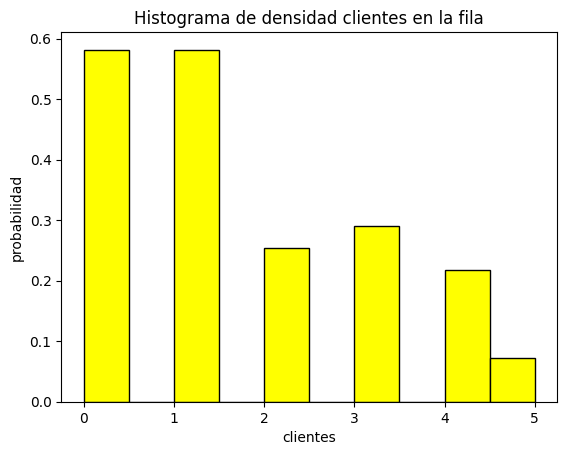

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(simu['clientes'],color='yellow',density=True,edgecolor='black')
plt.title("Histograma de densidad clientes en la fila")
plt.ylabel("probabilidad")
plt.xlabel("clientes")
plt.show()